# Analysis
Observed Trend 1:The Urban area has the highest number of rides, but the lowest avrg fare.
Observed Trend 2:The Rural area has the lowest number of rides, but the highest avrg fare.
Observed Trend 3:number of drivers to number rides ratio:
[Urban:      1.6:1]
[Suburban:  0.89:1]
[Rural:     0.82:1]    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Reading and Merging sets of data

In [2]:
#readign sets of data
city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')

#merging both sets
merged_data = pd.merge(city_data, ride_data, how='left')
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# Relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [3]:
#finding the avrg fare per city
avrg_fare = merged_data.groupby('city')['fare'].mean()

#finding ride per city
ride_per_city = merged_data.groupby('city')['ride_id'].count()

#finding the number of drivers per city
total_fare = merged_data.groupby('city')['fare'].sum()

#city type
city_type = merged_data.groupby('city')['driver_count','type']

In [4]:
#creating a DataFrame for relationships of info above
relationship_pd = pd.DataFrame({'city':avrg_fare.index,
                                'Avrg Fare':avrg_fare.values,
                                'Rides per city':ride_per_city.values,
                                'Total Fare':total_fare.values,
                               })
#rearranges columns in dataframe
relationship_pd = relationship_pd[['city','Total Fare', 'Avrg Fare', 'Rides per city']]

In [5]:
relationship_pd.head()

,city,Total Fare,Avrg Fare,Rides per city
0,Alvarezhaven,741.79,23.928710,31
1,Alyssaberg,535.85,20.609615,26
2,Anitamouth,335.84,37.315556,9
3,Antoniomouth,519.75,23.625000,22
4,Aprilchester,417.65,21.981579,19


In [6]:
#mergening to DFs based on common column city
relationship_pd = pd.merge(relationship_pd, city_data, how='outer', on='city')
#city type
urban_df = relationship_pd[relationship_pd.type=='Urban']
suburban_df = relationship_pd[relationship_pd.type=='Suburban']
rural_df = relationship_pd[relationship_pd.type=='Rural']

In [7]:
urban_df.head()

,city,Total Fare,Avrg Fare,Rides per city,driver_count,type
0,Alvarezhaven,741.79,23.928710,31,21,Urban
1,Alyssaberg,535.85,20.609615,26,67,Urban
3,Antoniomouth,519.75,23.625000,22,21,Urban
4,Aprilchester,417.65,21.981579,19,49,Urban
5,Arnoldview,778.30,25.106452,31,41,Urban


In [8]:
urban_df.mean()

Total Fare        607.247576
Avrg Fare          24.603991
Rides per city     24.621212
driver_count       39.500000
dtype: float64

In [9]:
suburban_df.head()

,city,Total Fare,Avrg Fare,Rides per city,driver_count,type
2,Anitamouth,335.84,37.315556,9,16,Suburban
6,Campbellport,505.67,33.711333,15,26,Suburban
7,Carrollbury,366.06,36.606000,10,4,Suburban
9,Clarkstad,372.62,31.051667,12,21,Suburban
10,Conwaymouth,380.51,34.591818,11,18,Suburban


In [10]:
suburban_df.mean()

Total Fare        532.650238
Avrg Fare          30.962713
Rides per city     17.166667
driver_count       15.190476
dtype: float64

In [11]:
rural_df.head()

,city,Total Fare,Avrg Fare,Rides per city,driver_count,type
17,East Leslie,370.27,33.660909,11,9,Rural
18,East Stephen,390.53,39.053000,10,6,Rural
19,East Troybury,232.71,33.244286,7,3,Rural
21,Erikport,240.35,30.043750,8,3,Rural
25,Hernandezshire,288.02,32.002222,9,10,Rural


In [12]:
rural_df.mean()

Total Fare        236.393889
Avrg Fare          34.207143
Rides per city      6.944444
driver_count        5.777778
dtype: float64

In [13]:
#ploting
urban_handle = plt.scatter(urban_df['Rides per city'], urban_df['Avrg Fare'], marker="o", 
            facecolors="red", edgecolors="black", label="urban", alpha=0.75)
suburban_handle = plt.scatter(suburban_df['Rides per city'], suburban_df['Avrg Fare'], marker="o", 
            facecolors="yellow", edgecolors="black", label="suburban", alpha=0.75)
rural_handle = plt.scatter(rural_df['Rides per city'], rural_df['Avrg Fare'], marker="o", 
            facecolors="blue", edgecolors="black", label="rural", alpha=0.75)

In [14]:
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0, 70)
plt.ylim(0, 60)
plt.grid()
plt.legend(handles=[urban_handle, suburban_handle, rural_handle],loc="lower right")

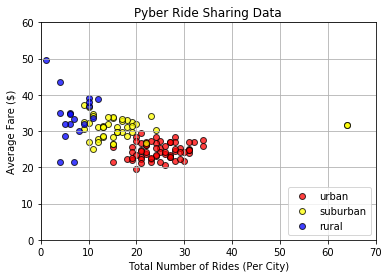

In [15]:
plt.show()

# Percentage  of Total Fares by City Type

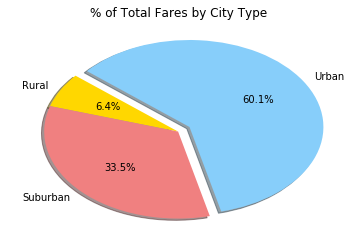

In [16]:
#sum of total fares
sum_of_total_fares = relationship_pd.groupby('type')['Total Fare', 'Avrg Fare'].sum()

rural_ares = sum_of_total_fares.loc['Rural'][0]
suburban_fares = sum_of_total_fares.loc['Suburban'][0]
urban_fares = sum_of_total_fares.loc['Urban'][0]

#ploting
plt.title('% of Total Fares by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_ares, suburban_fares, urban_fares]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]


plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

plt.show()

# Percentage of Total Rides by City Type

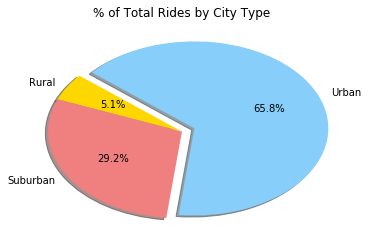

In [17]:
#sum of total rides
sum_of_total_rides = relationship_pd.groupby('type')['Rides per city', 'driver_count'].sum()

rural_ares = sum_of_total_rides.loc['Rural'][0]
suburban_fares = sum_of_total_rides.loc['Suburban'][0]
urban_fares = sum_of_total_rides.loc['Urban'][0]

#ploting
plt.title('% of Total Rides by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_ares, suburban_fares, urban_fares]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.show()

# Percentage of Total Drivers by City Type

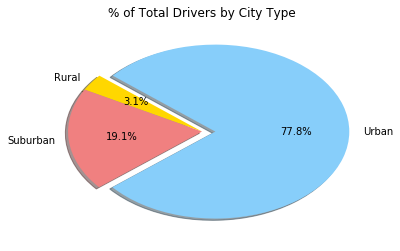

In [18]:
rural_drivers = sum_of_total_rides.loc['Rural'][1]
suburban_drivers = sum_of_total_rides.loc['Suburban'][1]
urban_drivers = sum_of_total_rides.loc['Urban'][1]

#ploting
plt.title('% of Total Drivers by City Type')
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_drivers, suburban_drivers, urban_drivers]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.show()